<a href="https://colab.research.google.com/github/taruj/Advanced-Regression-Assignment/blob/main/Advanced_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
`Surprise Housing `a US Based Housing company plans to enter the Australian market. The company is looking at prospective properties to buy to enter the market.

Before investing the company would like to `predict the value` of the prospective properties and then decide to invest (or not). 

The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company would also like to know `which factors (features of the houses) that are significant` in predicting the price of a house, and what is the impact of those variables in deciding the price of the house.

### Technical Goals
Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest.
Determine the optimal value of lambda for ridge and lasso regression.
This model will then be used by the management to understand how exactly the prices vary with the variables

### Approach for the Solution
- Exploratory Data Analysis 
- Data cleaning
- Data preparation 
  - Encoding, standardization and normalization
- Model building
- Conclusions

### Python Notebook Notes
1. Terms - Variable / Feature / Column is used an interchangeable manner. 
2. Conclusion - All conclusions are in <font color="blue"> Blue Color </font>
3. Cautions - All Cautions / Warnings are in <font color="red"> Red Color </font>







Source: "The machine learning community calls them features (also attributes or inputs).  There is a subtle difference in meaning.  In predictive modeling, depending on the nature of the data, considerable work may be required to transform and winnow down data and text to a usable set of predictors.  This process is termed “feature engineering.”  The comparable term in statistics – “variable selection” – does not imply such a wide ranging process." https://www.statistics.com/02-03-2015-week-5-features-vs-variables/
2. 

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd

# Vizulization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Suppress Warning
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading the Dataset

from google.colab import drive
drive.mount('/content/drive')

data =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Adv-Reg-Assign.csv')


Mounted at /content/drive


In [3]:
## Get basic information on the data set

In [4]:
## Size of data 
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
## Drop the ID Column as it doesn't add value to the pediction
data.drop("Id",axis=1,inplace=True)

In [7]:
# Identify Features with  missing data
print(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False)[round(data.isnull().sum()/len(data.index),2) > 0])



PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


<font color = "blue"> Since more than 40% data is missing in Alley, PoolQC, Fence, FirePlaceQu, MiscFeature we will drop them </font>

In [8]:
## Drop Features
data.drop(["Alley", "Fence", "FireplaceQu", "PoolQC","MiscFeature"],axis=1,inplace=True)
## Check Size of data 
data.shape

(1460, 75)

In [9]:
# We will now check for numerical and categorical features
categorical = []
numerical = []
for i in data.columns:
    if data[i].dtypes != 'O':
        numerical.append(i)
    else:
        categorical.append(i)
print(len(numerical))
print(len(categorical))

37
38


<font color="blue"> There are `37 Numerical Features` and `38 Categorical Features` in the dataset </font>

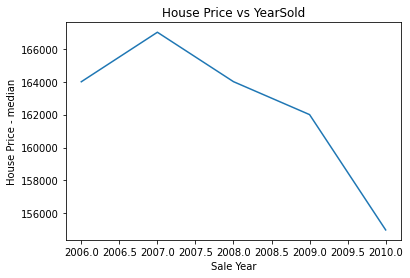

In [10]:
#  Evaluate median price changes vs with the year
data['YrSold'] = data['YrSold'].astype('int')
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Sale Year')
plt.ylabel('House Price - median')
plt.title("House Price vs YearSold")
plt.show()

<font color = "blue"> Sharp decline in house prices can be observer following 2007 and 2008 housing bubble crash </font>
<font color = "green">
<p> <b> Age - Current Year - Year) Year of Sale -  has an direct and significant affect to sale price </b> </font>

In [13]:
# Identify the features related to Year and see how price varies in comparison to the properties age
year_features = []
for i in data.columns:
    if 'Year' in i or 'year' in i or 'Yr' in i or 'yr' in i:
        year_features.append(i)
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

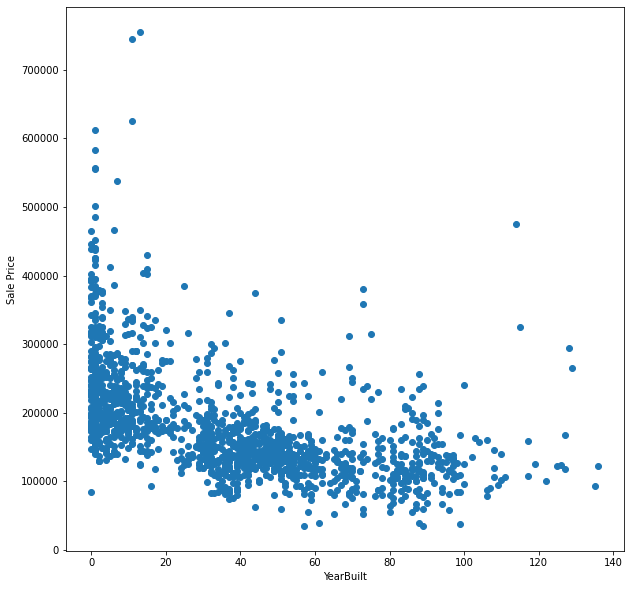

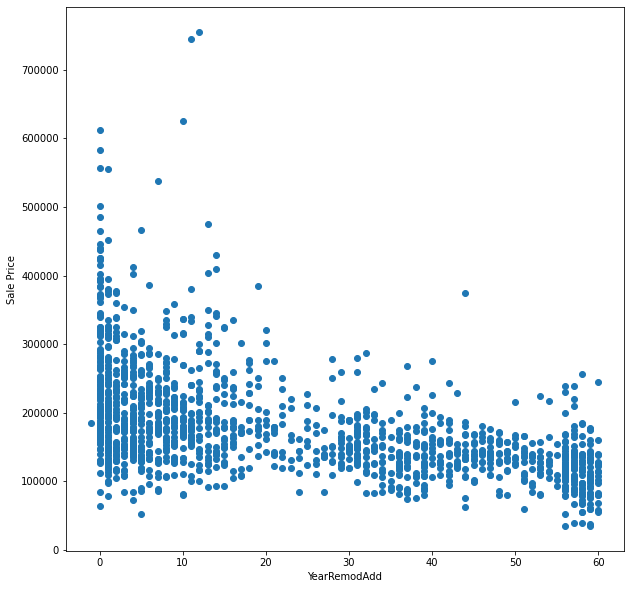

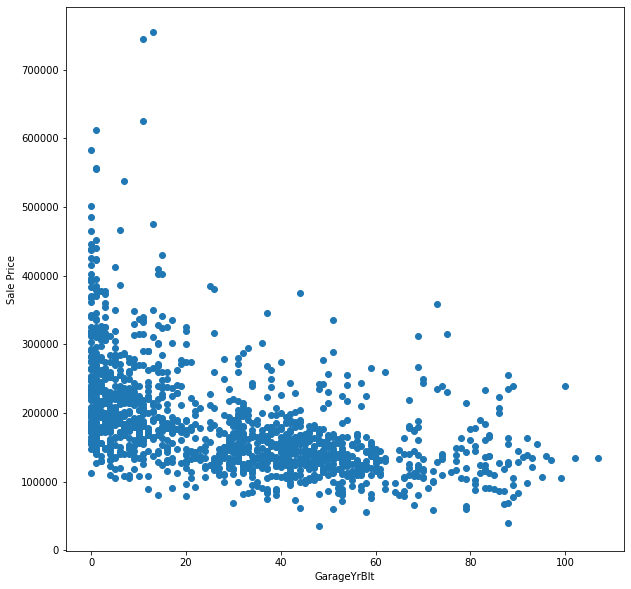

In [17]:
# Comparing the Age of the Building / Renovated Building / Garage with the Sold Price
for feature in year_features:
    if feature!='YrSold':
        data_temp=data.copy()
        plt.figure(figsize=(10,10))
        data_temp[feature]=data_temp['YrSold']-data[feature]
        plt.scatter(data_temp[feature],data_temp['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

<font color="blue"> Older properties look to have lower price than the newwer properties</font> 


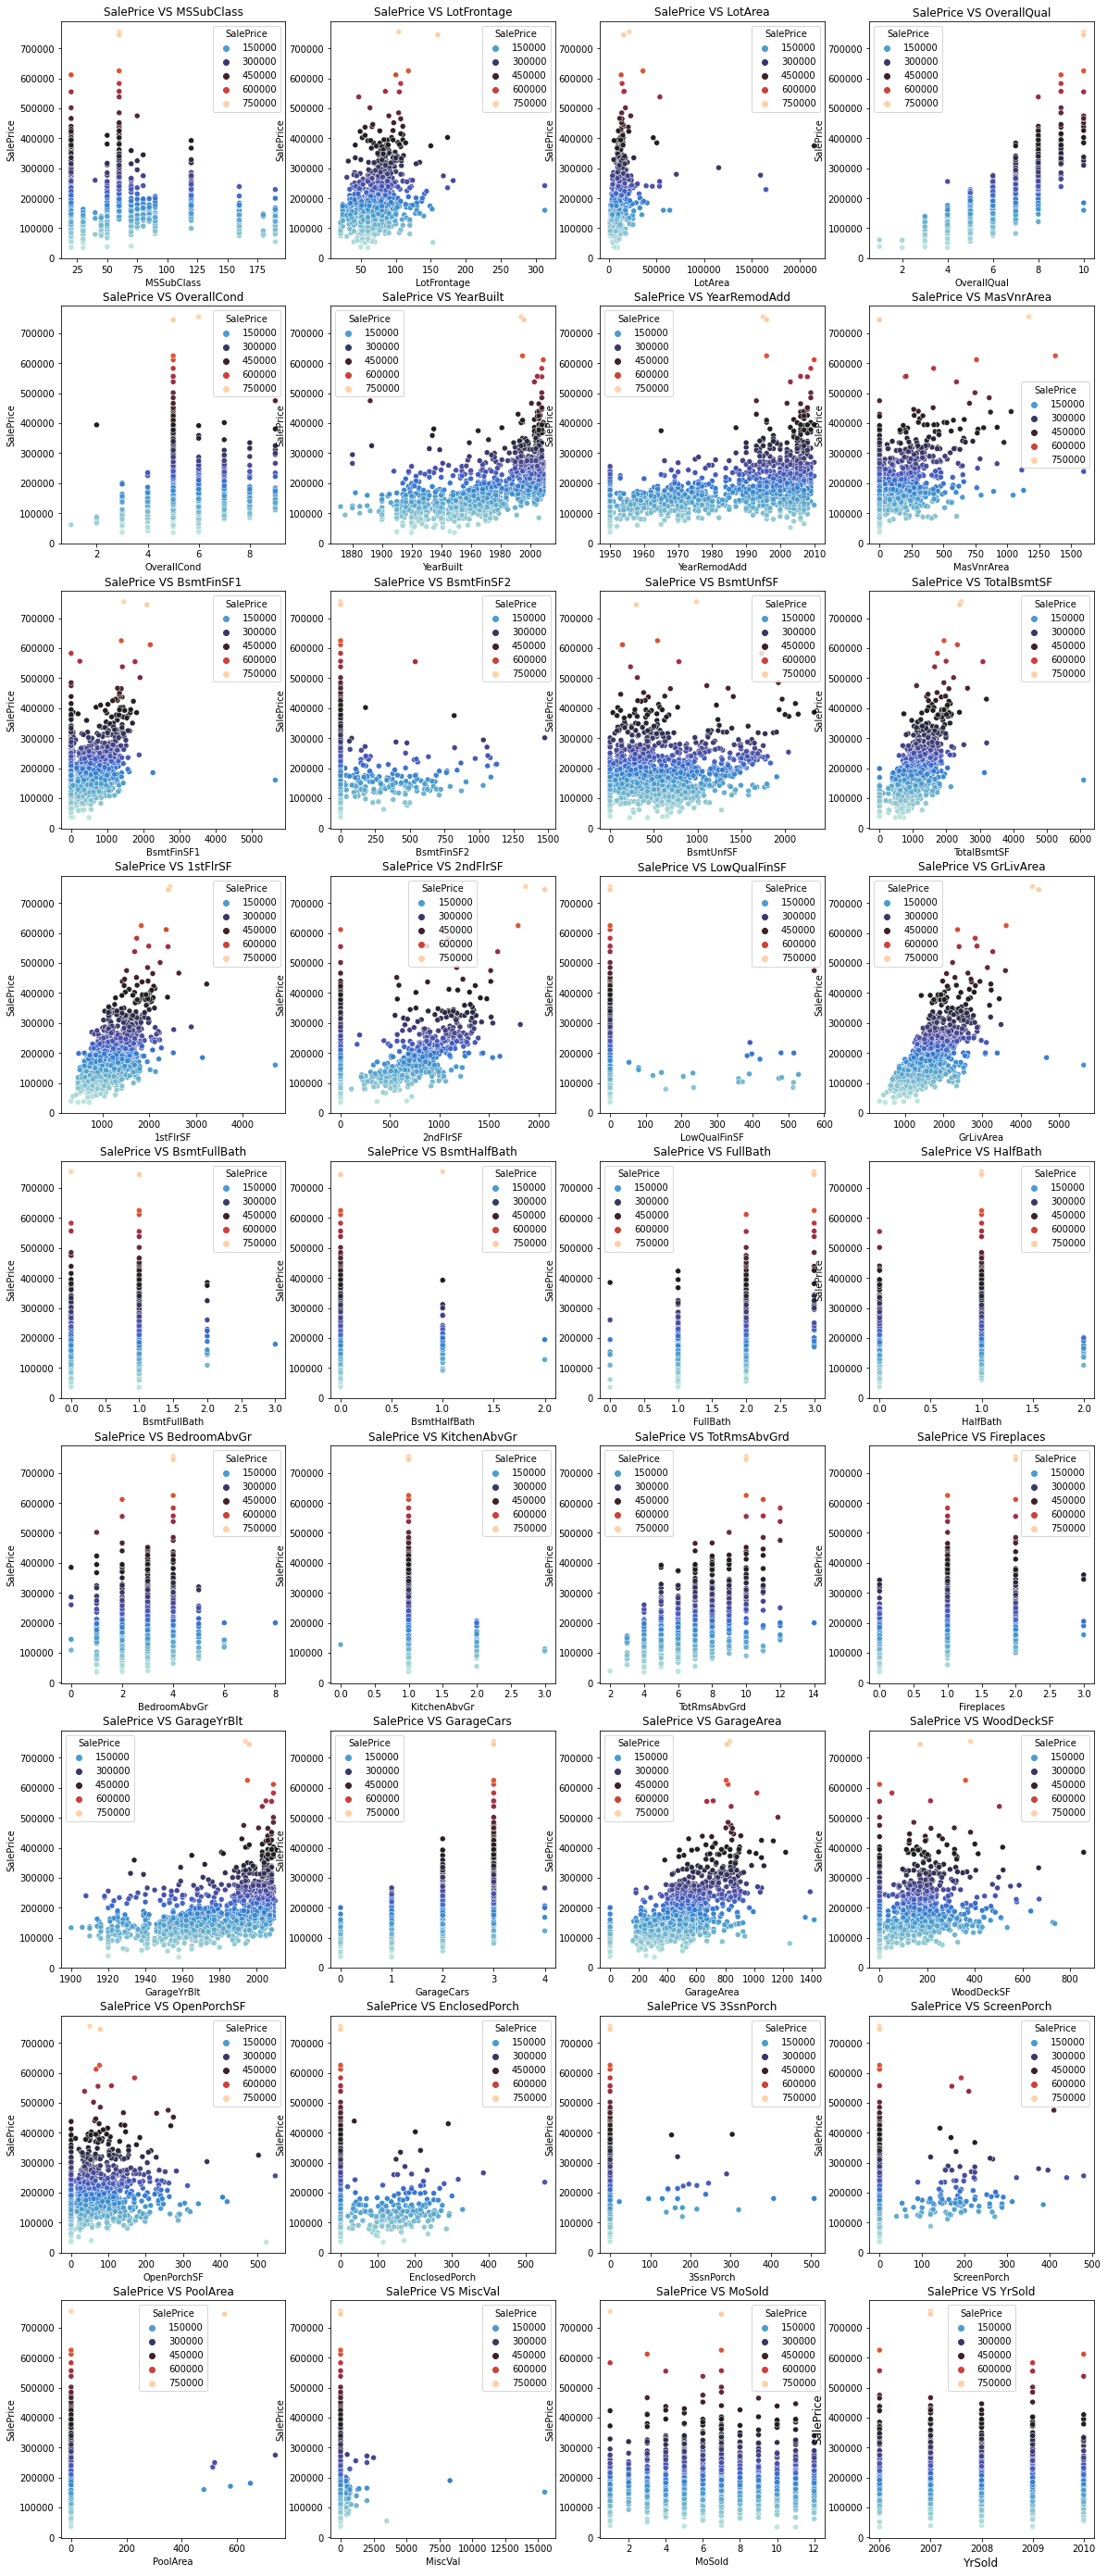

In [22]:
numericals = data.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(9,4,figsize=(20,50))
for i,ax in zip(numericals.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=numericals,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

<font color="blue">
<b>Critical Observations</b> <p>
1. Older Properties are cheaper than Newer Properties <p>
2. Month (of Year) has no effect on the price. <p>
3. Property Prices and Total Basement Area seem to be have a direct corelation. Linear Relationship exists. <p>
4. Property Prices and GRLiving Area seem to be have a direct corelation.<p>


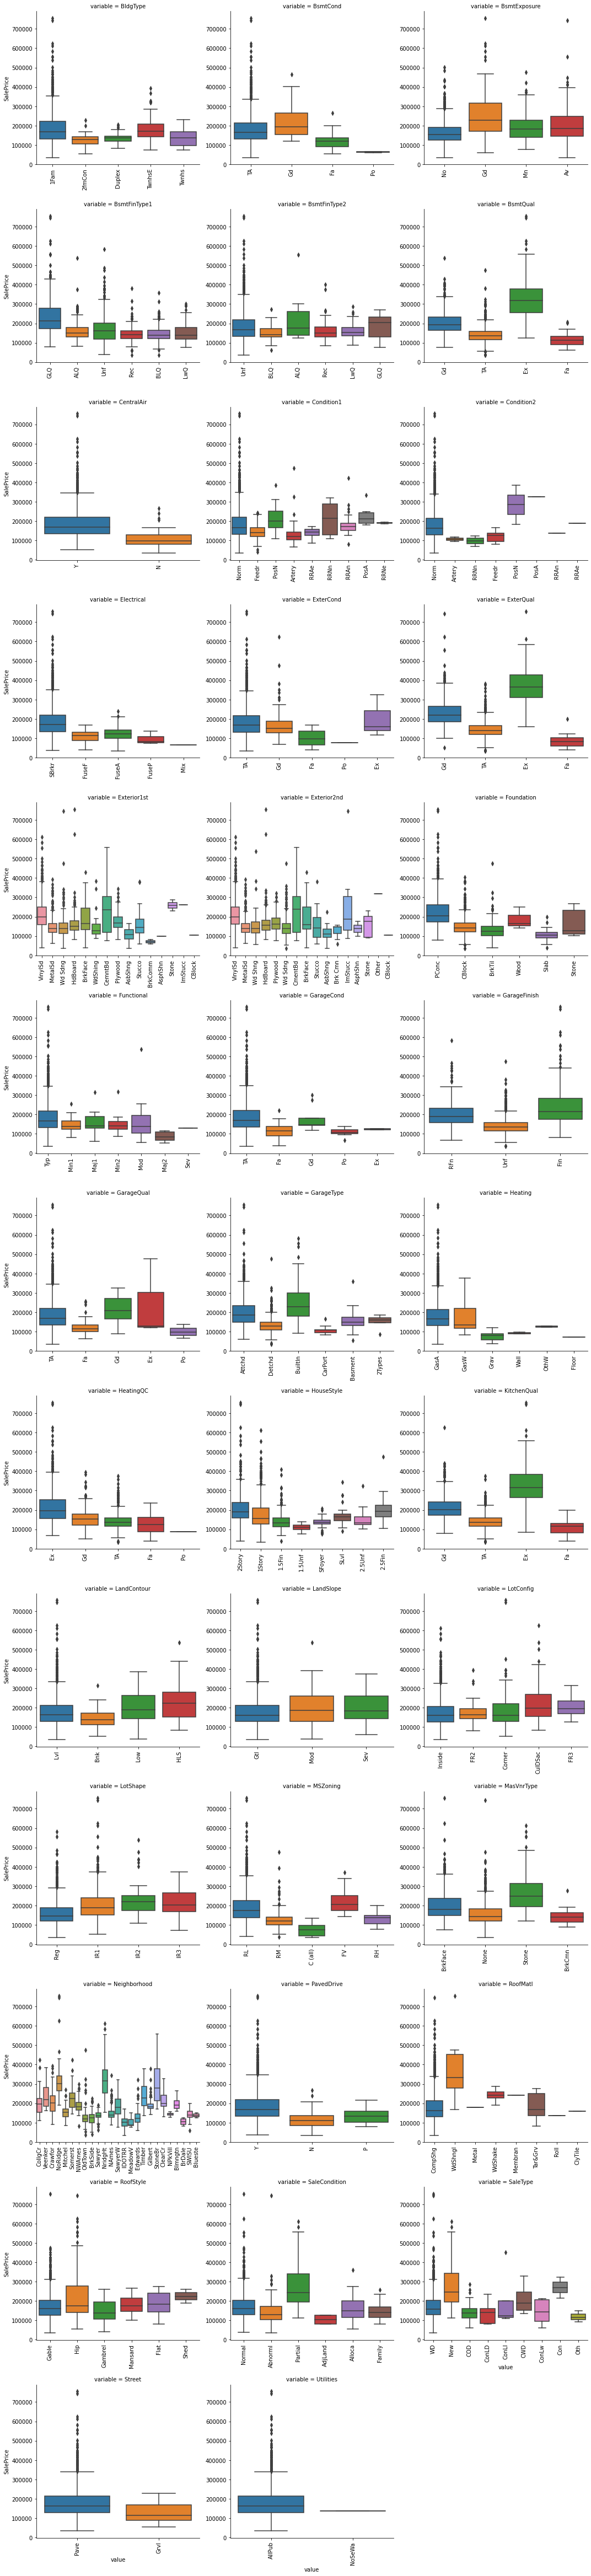

In [24]:
## Categorical Features vs Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = data.select_dtypes(exclude=['int64','float64'])
f = pd.melt(data, id_vars=['SalePrice'], value_vars=sorted(data[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")


* Higher Property prices if the basement quality is Good or Excellent
* Higher Property prices if the basement is Good and Excellent
* Higher Property prices if the Kitchen is Good Quality
* Higher Property prices that have Paved alleys
<p> Outliers are present and will be taken into consideration


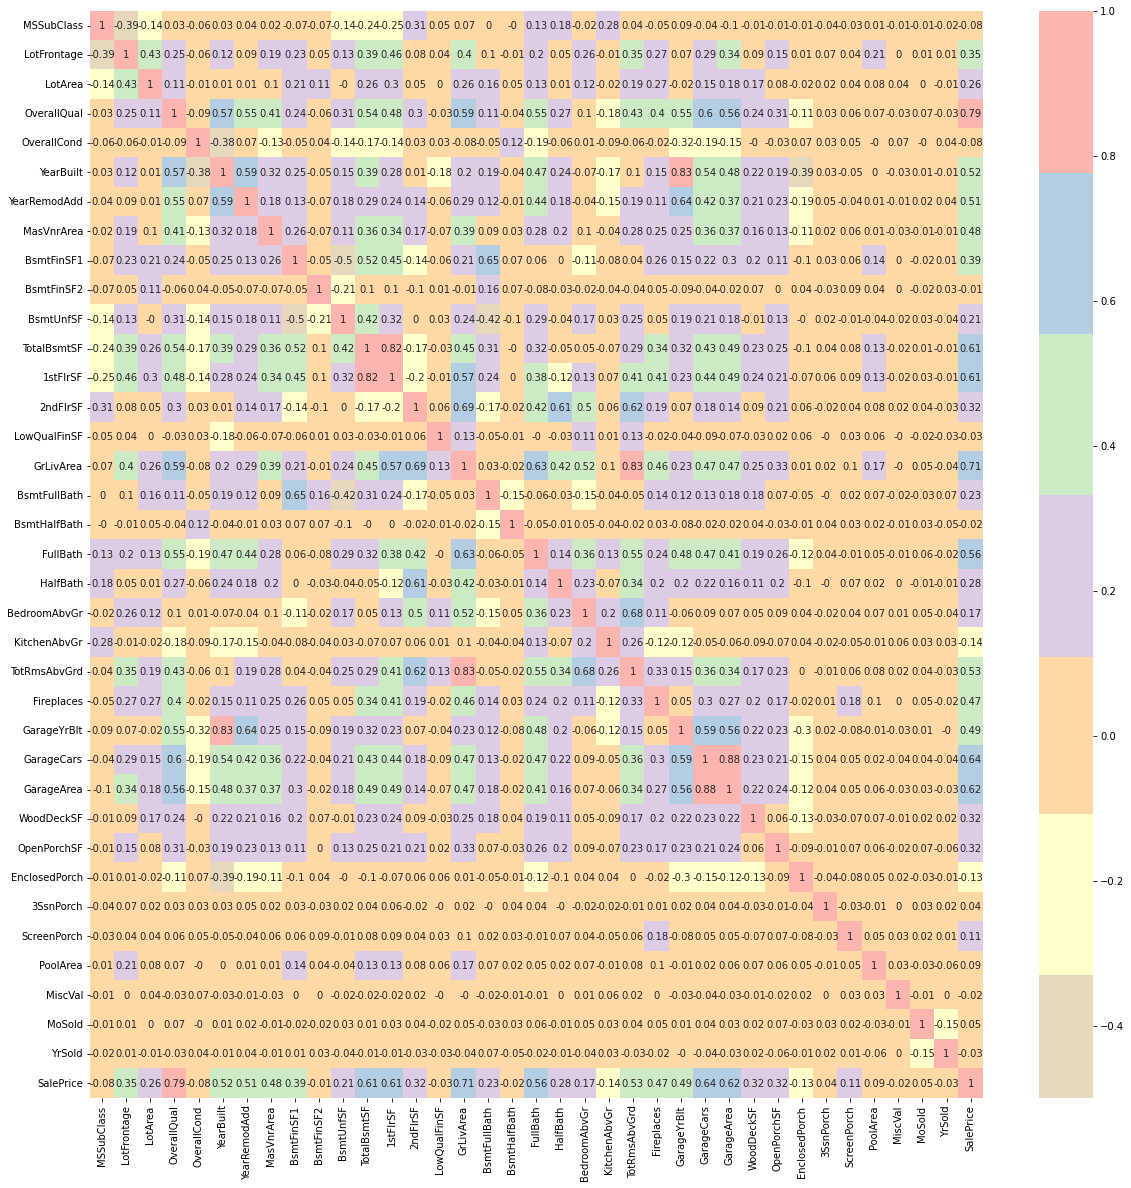

In [30]:
# Plotting the Corelation
plt.subplots(figsize = (20,20))
sns.heatmap(round(numericals.corr(),2), cmap='Pastel1_r' , annot=True, center = 0)
plt.show()